## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

In [5]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [6]:
data=data.drop('target', axis = 1)

In [7]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054


### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

### Find correlation between features

In [8]:
##https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
correlation=data.corr()

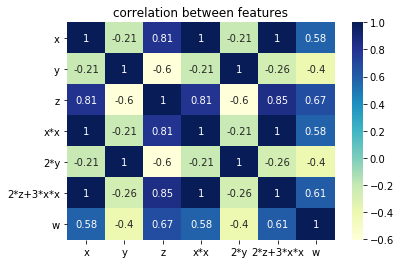

In [9]:
dataplot = sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.title("correlation between features")
plt.show()

### Finding the best model for the given data

In [10]:
##https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn
alpha=np.logspace(0.001,0.1,1,5,8)
A=alpha
#print(A)
param_grid = {'C': A }
model = LogisticRegression(random_state=42)
Search=GridSearchCV(model,param_grid , cv=5)
Search.fit(X,Y)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.00208161])})

In [11]:
Search.best_params_

{'C': 1.0020816050796328}

### Getting the weights with the original data

In [12]:
best_model=LogisticRegression(C=1.0020816050796328,random_state=42)
best_model.fit(X,Y)
weight = best_model.coef_[0]
print("weight:",weight)

weight: [ 0.72329758 -0.90390578  1.68356004  0.66756968 -0.90390578  0.80407875
  0.50979515]


In [13]:
##https://www.codegrepper.com/code-examples/python/how+to+get+test+accuracy+in+logistic+regression+model+in+python
from sklearn.metrics import accuracy_score
pred = best_model.predict(X)
best_model_accuracy=(accuracy_score(Y, pred))
print(best_model_accuracy)

1.0


### Modifying original data 

In [14]:
Xm = X+0.01

In [15]:
best_model.fit(Xm,Y)

LogisticRegression(C=1.0020816050796328, random_state=42)

In [16]:
pred_mod = best_model.predict(Xm)
best_model_accuracy_edited = (accuracy_score(Y, pred_mod))
print(best_model_accuracy_edited)

1.0


In [17]:
weight_mod = best_model.coef_[0]
print("weight:",weight_mod)

weight: [ 0.72329329 -0.90390618  1.68356007  0.66757059 -0.90390618  0.80407955
  0.50979151]


###  Checking deviations in metric and weights 

In [18]:
Acc_diff=(best_model_accuracy_edited-best_model_accuracy)
Acc_diff

0.0

In [19]:
Wt_diff = weight - weight_mod
Wt_diff

array([ 4.28394267e-06,  3.98921538e-07, -3.31293399e-08, -9.05736003e-07,
        3.98921538e-07, -8.00066609e-07,  3.63705858e-06])

In [20]:
percent_change=[]
for i in range(len(data.columns)):
    percent=100*(Wt_diff[i]/weight[i])
    percent_change.append(percent)

In [21]:
print(percent_change)

[0.0005922794177936326, -4.413308829825735e-05, -1.967814583107191e-06, -0.0001356766229442956, -4.413308826140982e-05, -9.950102624229029e-05, 0.0007134353067270253]


In [22]:
##https://www.skytowner.com/explore/numpy_argpartition_method
top_four = np.argpartition(percent_change,2)[-4:]
print(top_four)
Top_four=(data.columns[top_four])
print("top four ", list(reversed(Top_four)))

[0 4 2 6]
top four  ['w', 'z', '2*y', 'x']


## Task2

In [23]:
alpha=np.logspace(0.001,0.1,1,5,8)
A=alpha
#print(A)
param_grid = {'C': A }
model_SVM = SVC(kernel="linear",random_state=42)
Search=GridSearchCV(model_SVM,param_grid , cv=5)
Search.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42),
             param_grid={'C': array([1.00208161])})

In [24]:
Search.best_params_

{'C': 1.0020816050796328}

In [25]:
best_model=SVC(kernel="linear",C=1.0020816050796328,random_state=42)
best_model.fit(X,Y)
weight = best_model.coef_[0]
print("weight:",weight)

weight: [ 0.42059793 -0.36090175  1.04442829  0.34263578 -0.36090175  0.43447147
  0.17056102]


In [26]:
from sklearn.metrics import accuracy_score
pred = best_model.predict(X)
best_model_accuracy=(accuracy_score(Y, pred))
print(best_model_accuracy)

1.0


In [27]:
Xm = X+0.01
best_model.fit(Xm,Y)

SVC(C=1.0020816050796328, kernel='linear', random_state=42)

In [28]:
pred_mod = best_model.predict(Xm)
best_model_accuracy_edited = (accuracy_score(Y, pred_mod))
print(best_model_accuracy_edited)

1.0


In [29]:
weight_mod = best_model.coef_[0]
print("weight:",weight_mod)

weight: [ 0.42059794 -0.36090176  1.04442829  0.34263578 -0.36090176  0.43447147
  0.17056109]


In [30]:
Acc_diff=(best_model_accuracy_edited-best_model_accuracy)
Acc_diff

0.0

In [31]:
Wt_diff = weight - weight_mod
Wt_diff

array([-7.43466311e-09,  7.75015052e-09,  3.76124021e-10,  9.42294021e-11,
        7.75015041e-09,  1.30217614e-10, -6.79247945e-08])

In [32]:
percent_change=[]
for i in range(len(data.columns)):
    percent=100*(Wt_diff[i]/weight[i])
    percent_change.append(percent)
    
print(percent_change)

[-1.7676413861213756e-06, -2.1474405290860614e-06, 3.601243126721183e-08, 2.7501331521809104e-08, -2.1474404983235887e-06, 2.9971499620355126e-08, -3.982433563470589e-05]


In [78]:
top_four = np.argpartition(percent_change,1)[-4:]
print(top_four)
Top_four=(data.columns[top_four])
print("top four ", list(reversed(Top_four)))

[3 4 5 0]
top four  ['x', '2*z+3*x*x', '2*y', 'x*x']


1.After perturbation test, since there is no significant change in the weights , there is less chance of collinearity.

2.The weights change in the order of e-06 to e-08

3.Some features are correlated with others.

4.percentage changes of Linear SVM [-1.7676413861213756e-06, -2.1474405290860614e-06, 3.601243126721183e-08, 2.7501331521809104e-08, -2.1474404983235887e-06, 2.9971499620355126e-08, -3.982433563470589e-05]

5.Top 4 features=['x', '2*z+3*x*x', '2*y', 'x*x']

6.percentage changes of logistic regression [0.0005922794177936326, -4.413308829825735e-05, -1.967814583107191e-06, -0.0001356766229442956, -4.413308826140982e-05, -9.950102624229029e-05, 0.0007134353067270253]

7.Top 4 features = ['w', 'z', '2*y', 'x']